In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('comments.csv')
data

,video_id,comment_id,comment_like_count,comment,video_title,polarity,polarity_category
0,wjjZmFVM9oU,UgwLIYLEu13PUCwv8hh4AaABAg,3,good luck canadian friends tomorrow 39 match g...,justin trudeau meets canadian men 39 national ...,0.155556,1
1,wjjZmFVM9oU,UgzMfwXTJ3WW0tooRPJ4AaABAg,23,always good elected official regardless party ...,justin trudeau meets canadian men 39 national ...,0.350000,1
2,wjjZmFVM9oU,UgyYXCP_RtevFmYnfPx4AaABAg,6,first drake justin loving support high influen...,justin trudeau meets canadian men 39 national ...,0.336667,1
3,wjjZmFVM9oU,Ugx20F1dU9eVuS-1BXJ4AaABAg,0,hype team,justin trudeau meets canadian men 39 national ...,0.000000,-1
4,wjjZmFVM9oU,UgxSbO6eve0n88jJp3Z4AaABAg,5,canadian men soccer cbc channel cbc bring live...,justin trudeau meets canadian men 39 national ...,0.136364,1
...,...,...,...,...,...,...,...
7305,fIaWgbHdwIU,UghXMHuU8pmGu3gCoAEC,7,seizure,mark mcmorris 39 next stop 2018 olympics test ...,0.000000,-1
7306,fIaWgbHdwIU,Uggd8cxZW0BmrngCoAEC,3,video effects ruined video,mark mcmorris 39 next stop 2018 olympics test ...,0.000000,-1
7307,LliIdJVgVAA,UgzQg6--OmyOAzgdf9V4AaABAg,0,great see ontario residents making great use v...,tour mattamy national cycling centre milton,0.533333,1
7308,LliIdJVgVAA,Ugiiv0lPeCzEh3gCoAEC,0,wonder would faster 3 printed bike,tour mattamy national cycling centre milton,0.000000,-1


 1    4299
-1    3011
Name: polarity_category, dtype: int64

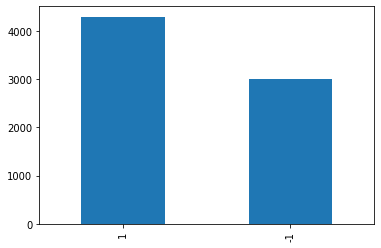

In [ ]:
# Printing the frequency bar graph of polarity categories
data.polarity_category.value_counts().plot.bar()
data.polarity_category.value_counts()

In [ ]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(data['comment'].values.astype('U'), data['polarity_category'], test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5848,)
(5848,)
(1462,)
(1462,)


In [ ]:
# Feature Extraction from Text Data
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)
tf_train.shape

(5848, 10281)

In [ ]:
vect.vocabulary_

{'remember': 7601,
 'mother': 6109,
 'literally': 5503,
 'jumped': 5089,
 'seat': 8068,
 'watching': 9936,
 'nadia': 6189,
 'exercises': 3387,
 'ten': 9155,
 'never': 6289,
 'forget': 3776,
 'olympic': 6491,
 'games': 3926,
 'comaneci': 2084,
 'congratulations': 2232,
 'marco': 5736,
 'beautiful': 1188,
 'run': 7902,
 'much': 6147,
 'love': 5590,
 'canada': 1677,
 'dylan': 3041,
 'hair': 4271,
 'beard': 1173,
 'game': 3921,
 'point': 6996,
 'person': 6830,
 'standing': 8702,
 'bottom': 1441,
 'left': 5391,
 'going': 4077,
 'stand': 8699,
 'absolutely': 506,
 'brilliant': 1522,
 'performance': 6810,
 'evan': 3317,
 'dunphee': 3034,
 'might': 5966,
 'considered': 2255,
 'extreme': 3442,
 'physical': 6877,
 'challenge': 1824,
 'olympics': 6492,
 'scorching': 8029,
 'conditions': 2212,
 'br': 1469,
 'bravo': 1488,
 '39': 302,
 'amazing': 755,
 'canadian': 1679,
 'athletes': 977,
 'making': 5687,
 'us': 9727,
 'proud': 7244,
 'cheers': 1887,
 'man': 5703,
 'oilers': 6468,
 'woulda': 10145,


In [ ]:
# Sentiment Classification
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(tf_train, y_train)

LogisticRegression()

In [ ]:
# Accuracy score on the training dataset
lr.score(tf_train, y_train)

0.9887140902872777

In [ ]:
# Accuracy score on the testing dataset
lr.score(tf_test, y_test)

0.9097127222982216

In [ ]:
expected = y_test
predicted = lr.predict(tf_test)

In [ ]:
# Confusion Matrix
import sklearn.metrics as metrics

cf = metrics.confusion_matrix(expected, predicted, labels=[1, -1])
cf

array([[769,  94],
       [ 38, 561]])

In [ ]:
!pip install mlxtend  
!pip install -U scikit-learn
!pip install sklearn

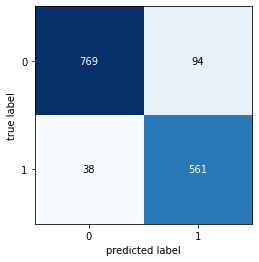

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cf)
plt.show()

In [ ]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

          -1       0.86      0.94      0.89       599
           1       0.95      0.89      0.92       863

    accuracy                           0.91      1462
   macro avg       0.90      0.91      0.91      1462
weighted avg       0.91      0.91      0.91      1462



In [ ]:
print(metrics.f1_score(expected, predicted, average='macro'))

0.9078474629687994
